In [11]:
!unzip "/content/archive(1).zip" -d "/content/"

Archive:  /content/archive(1).zip
  inflating: /content/brain_tumor_dataset/no/1 no.jpeg  
  inflating: /content/brain_tumor_dataset/no/10 no.jpg  
  inflating: /content/brain_tumor_dataset/no/11 no.jpg  
  inflating: /content/brain_tumor_dataset/no/12 no.jpg  
  inflating: /content/brain_tumor_dataset/no/13 no.jpg  
  inflating: /content/brain_tumor_dataset/no/14 no.jpg  
  inflating: /content/brain_tumor_dataset/no/15 no.jpg  
  inflating: /content/brain_tumor_dataset/no/17 no.jpg  
  inflating: /content/brain_tumor_dataset/no/18 no.jpg  
  inflating: /content/brain_tumor_dataset/no/19 no.jpg  
  inflating: /content/brain_tumor_dataset/no/2 no.jpeg  
  inflating: /content/brain_tumor_dataset/no/20 no.jpg  
  inflating: /content/brain_tumor_dataset/no/21 no.jpg  
  inflating: /content/brain_tumor_dataset/no/22 no.jpg  
  inflating: /content/brain_tumor_dataset/no/23 no.jpg  
  inflating: /content/brain_tumor_dataset/no/24 no.jpg  
  inflating: /content/brain_tumor_dataset/no/25 no.jpg

In [13]:
# Import libraries
import cv2
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D


In [16]:
dataset_path = "/content/brain_tumor_dataset/no"  # ← change to your folder

# Read and resize all images
images = []
for file in os.listdir(dataset_path):
    if file.endswith(('.png', '.jpg', '.jpeg')):
        img = cv2.imread(os.path.join(dataset_path, file), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (256,256))
        images.append(img)

images = np.array(images, dtype='float32') / 255.0
print("Total images loaded:", len(images))


Total images loaded: 92


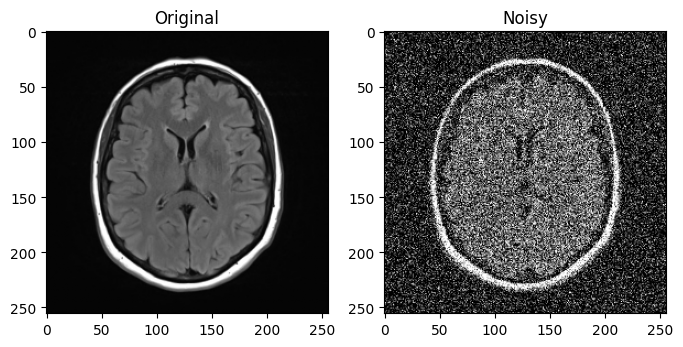

In [17]:
noise_factor = 0.3
noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
noisy_images = np.clip(noisy_images, 0., 1.)

# Show sample
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(images[0], cmap='gray'); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(noisy_images[0], cmap='gray'); plt.title("Noisy")
plt.show()

In [18]:
dataset_path = "/content/brain_tumor_dataset/yes"  # ← change to your folder

# Read and resize all images
images = []
for file in os.listdir(dataset_path):
    if file.endswith(('.png', '.jpg', '.jpeg')):
        img = cv2.imread(os.path.join(dataset_path, file), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (256,256))
        images.append(img)

images = np.array(images, dtype='float32') / 255.0
print("Total images loaded:", len(images))


Total images loaded: 87


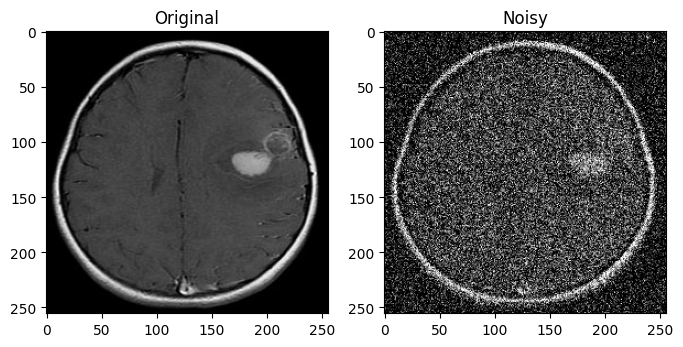

In [19]:
noise_factor = 0.3
noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
noisy_images = np.clip(noisy_images, 0., 1.)

# Show sample
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(images[0], cmap='gray'); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(noisy_images[0], cmap='gray'); plt.title("Noisy")
plt.show()

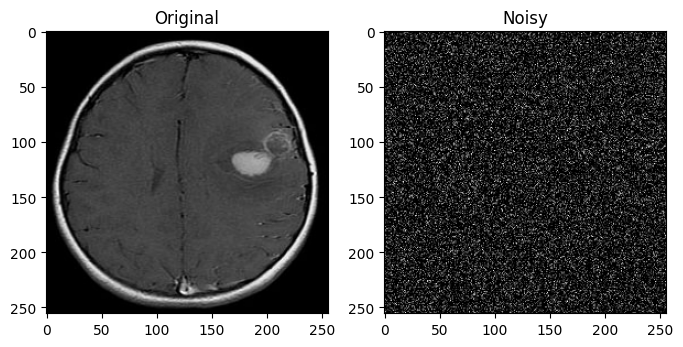

In [24]:
noise_factor = 0.3
noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
noisy_images = np.clip(noisy_images, 0., 1.)

# Show sample
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(images[0], cmap='gray'); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(noisy_images[0], cmap='gray'); plt.title("Noisy")
plt.show()


In [25]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(256,256,1)),
    MaxPooling2D((2,2), padding='same'),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    UpSampling2D((2,2)),
    Conv2D(1, (3,3), activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
x_train = noisy_images.reshape((-1,256,256,1))
y_train = images.reshape((-1,256,256,1))

model.fit(x_train, y_train, epochs=10, batch_size=8, validation_split=0.1)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - loss: 0.6184 - val_loss: 0.3785
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - loss: 0.2979 - val_loss: 0.0915
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - loss: 0.0630 - val_loss: 0.0161
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - loss: 0.0141 - val_loss: 0.0091
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - loss: 0.0100 - val_loss: 0.0085
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - loss: 0.0098 - val_loss: 0.0085
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - loss: 0.0095 - val_loss: 0.0085
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - loss: 0.0096 - val_loss: 0.0085
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - loss: 0.0096 - val_loss: 0.0085
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - loss: 0.0095 - val_loss: 0.0085


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


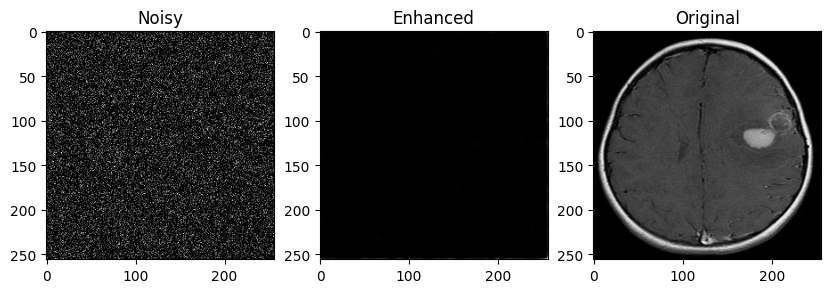

In [27]:
enhanced_images = model.predict(x_train)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1); plt.imshow(noisy_images[0], cmap='gray'); plt.title("Noisy")
plt.subplot(1,3,2); plt.imshow(enhanced_images[0].reshape(256,256), cmap='gray'); plt.title("Enhanced")
plt.subplot(1,3,3); plt.imshow(images[0], cmap='gray'); plt.title("Original")
plt.show()

In [29]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

results = []

for i in range(len(images)):
    # Compute PSNR
    psnr_before = peak_signal_noise_ratio(images[i], noisy_images[i], data_range=images[i].max() - images[i].min())
    psnr_after = peak_signal_noise_ratio(images[i], enhanced_images[i].reshape(256,256), data_range=images[i].max() - images[i].min())

    # Compute SSIM (specify data_range)
    ssim_before = structural_similarity(images[i], noisy_images[i], data_range=images[i].max() - images[i].min())
    ssim_after = structural_similarity(images[i], enhanced_images[i].reshape(256,256), data_range=images[i].max() - images[i].min())

    results.append([i+1, psnr_before, psnr_after, ssim_before, ssim_after])


In [34]:
df.to_csv("/content/enhancement_metrics.csv", index=False)
print("Metrics saved as enhancement_metrics.csv")

Metrics saved as enhancement_metrics.csv


In [37]:
# =============================
# Step 1: Install dependencies
# =============================
!pip install -q bm3d scikit-image torchvision==0.15.2 torch==2.2.0 pillow tqdm tabulate


ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3
ERROR: Could not find a version that satisfies the requirement torchvision==0.15.2 (from versions: 0.17.0, 0.17.1, 0.17.2, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.20.0, 0.20.1, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.24.0)
ERROR: No matching distribution found for torchvision==0.15.2


In [47]:
pip install bm3d

  Using cached bm3d-4.0.3-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 862.0/862.0 kB 14.4 MB/s eta 0:00:00


In [48]:
# =============================
# Step 2: Import libraries
# =============================
import os, cv2, random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
from bm3d import bm3d
from tqdm import tqdm
from tabulate import tabulate
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim


import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


In [41]:
# =============================
# Step 3: Define dataset path
# =============================
# 🔹 Replace 'MyMedicalImages' with your actual folder name inside /content/
base_dir = '/content/yes'  # <-- change this to your uploaded folder name

def get_image_paths(root, exts=('png','jpg','jpeg','tif','tiff','bmp')):
    paths=[]
    for ext in exts:
        paths += glob(f"{root}/**/*.{ext}", recursive=True)
    return sorted(paths)

img_paths = get_image_paths(base_dir)
print(f"✅ Found {len(img_paths)} images in: {base_dir}")


✅ Found 87 images in: /content/yes


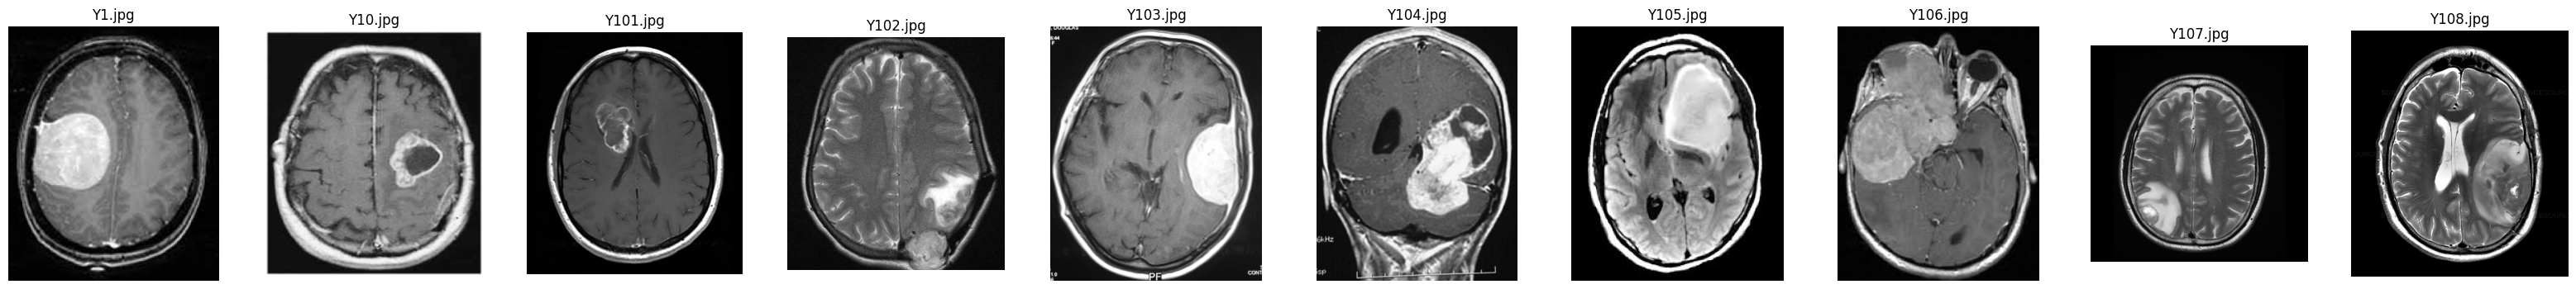

In [42]:
# =============================
# Step 4: Preview few images
# =============================
n_show = min(10, len(img_paths))
fig, axs = plt.subplots(1, n_show, figsize=(4*n_show,4))
for i in range(n_show):
    im = Image.open(img_paths[i]).convert('L')
    axs[i].imshow(im, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(os.path.basename(img_paths[i]))
plt.show()


In [43]:
# =============================
# Step 5: Utility functions
# =============================
def read_gray(path):
    return np.array(Image.open(path).convert('L'), dtype=np.float32) / 255.0

def save_gray(img, path):
    Image.fromarray((np.clip(img,0,1)*255).astype(np.uint8)).save(path)

def compute_metrics(original, processed):
    return psnr(original, processed, data_range=1.0), ssim(original, processed, data_range=1.0)


In [49]:
# =============================
# Step 6: Classical Enhancement
# (BM3D denoising + Upscaling)
# =============================
os.makedirs('results/classical', exist_ok=True)
records = []
for p in tqdm(img_paths[:10], desc="Classical pipeline (BM3D)"):
    img = read_gray(p)
    denoised = bm3d(img, sigma_psd=0.05)
    upscaled = cv2.resize(denoised, (img.shape[1]*2, img.shape[0]*2), interpolation=cv2.INTER_CUBIC)
    orig_up = cv2.resize(img, (img.shape[1]*2, img.shape[0]*2), interpolation=cv2.INTER_CUBIC)
    ps, ss = compute_metrics(orig_up, upscaled)
    records.append((os.path.basename(p), ps, ss))
    comp = np.hstack([orig_up, upscaled])
    save_gray(comp, f"results/classical/{os.path.basename(p)}_bm3d.png")

print(tabulate(records, headers=['File','PSNR','SSIM']))
print("✅ Classical enhanced images saved in results/classical/")

Classical pipeline (BM3D): 100%|██████████| 10/10 [05:00<00:00, 30.05s/it]

File         PSNR      SSIM
--------  -------  --------
Y1.jpg    36.0641  0.920716
Y10.jpg   37.9555  0.945738
Y101.jpg  39.6303  0.962624
Y102.jpg  37.0752  0.907481
Y103.jpg  41.9911  0.968982
Y104.jpg  35.1719  0.833817
Y105.jpg  37.2958  0.952727
Y106.jpg  36.3552  0.927972
Y107.jpg  41.2081  0.973996
Y108.jpg  43.2645  0.984081
✅ Classical enhanced images saved in results/classical/


In [52]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import random
from tqdm import tqdm

# =============================
# Step 7: Deep Learning DnCNN (Fixed)
# =============================

class DnCNN(nn.Module):
    def __init__(self, channels=1, depth=17):
        super().__init__()
        layers = [nn.Conv2d(channels, 64, 3, 1, 1), nn.ReLU(inplace=True)]
        for _ in range(depth - 2):
            layers += [nn.Conv2d(64, 64, 3, 1, 1), nn.BatchNorm2d(64), nn.ReLU(inplace=True)]
        layers.append(nn.Conv2d(64, channels, 3, 1, 1))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        return x - self.net(x)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using device:", device)

class MedDataset(Dataset):
    def __init__(self, paths, crop=128):
        self.paths = paths
        self.crop = crop
    def __len__(self):
        return len(self.paths)
    def __getitem__(self, i):
        img = read_gray(self.paths[i]).astype(np.float32)  # <-- ensure float32
        H, W = img.shape
        x, y = random.randint(0, H - self.crop), random.randint(0, W - self.crop)
        patch = img[x:x+self.crop, y:y+self.crop]
        noisy = np.clip(patch + np.random.normal(0, 0.05, patch.shape), 0, 1).astype(np.float32)
        return torch.tensor(noisy).unsqueeze(0), torch.tensor(patch).unsqueeze(0)

# ---- DataLoader ----
loader = DataLoader(MedDataset(img_paths, 128), batch_size=8, shuffle=True)

# ---- Model, optimizer, and loss ----
model = DnCNN().to(device)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

# ---- Training loop ----
for epoch in range(3):
    model.train()
    total = 0
    for noisy, clean in tqdm(loader, desc=f"Epoch {epoch+1}/3"):
        noisy, clean = noisy.to(device).float(), clean.to(device).float()  # <-- cast to float32
        out = model(noisy)
        loss = loss_fn(out, clean)
        opt.zero_grad()
        loss.backward()
        opt.step()
        total += loss.item()
    print(f"Avg loss: {total/len(loader):.6f}")

torch.save(model.state_dict(), "dncnn_model.pth")
print("✅ Model trained and saved as dncnn_model.pth (float-safe)")


Using device: cpu


Epoch 1/3: 100%|██████████| 11/11 [02:25<00:00, 13.25s/it]


Avg loss: 0.222731


Epoch 2/3: 100%|██████████| 11/11 [02:02<00:00, 11.11s/it]


Avg loss: 0.006076


Epoch 3/3: 100%|██████████| 11/11 [02:00<00:00, 10.94s/it]

Avg loss: 0.003610
✅ Model trained and saved as dncnn_model.pth (float-safe)
